In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yaml
from tqdm import *

from components import Robot, robot_from_dna, Coevolution

# Import Settings

In [3]:
with open("config.yaml", "r") as yamlfile:
    config = yaml.safe_load(yamlfile)

pop_size = config['pop_size'] # number of robots per generation
num_breeders = config['num_breeders'] # number of robots who can mate in each generation
num_gen = config['num_generations'] # total number of generations
iter_per_sim = config['iterations_per_simulation'] # number of rubbish-collection simulations per robot
moves_per_iter = config['moves_per_iteration'] # number of moves robot can make per simulation
print(pop_size,num_breeders,num_gen,iter_per_sim,moves_per_iter)

200 100 400 100 200


In [4]:
robot_one = Robot()
robot_two = Robot()

coevolution = Coevolution(robot_one,robot_two)
result = coevolution.simulate(5,5)

982 327
427 327
427 327
427 327
427 327
469 341
469 665
469 665
469 665
469 665
597 361
406 361
346 361
693 361
342 361
902 794
902 410
902 629
902 629
902 629
341 441
345 606
341 423
405 485
405 423


# Run Co-evolution

In [ ]:
# initial population
pop_one = [Robot() for x in range(pop_size)]
pop_two = [Robot() for x in range(pop_size)]
results_one = []
results_two = []

# run evolution
for i in tqdm(range(num_gen)):
    scores_one = np.zeros(pop_size)
    scores_two = np.zeros(pop_size)
    # iterate through all robots
    for idx in range(len(pop_one)):
    # run rubbish collection simulation and calculate fitness
        coevolution = Coevolution(pop_one[idx],pop_two[idx])
        score_one,score_two = coevolution.simulate(iter_per_sim, moves_per_iter)
        scores_one[idx] = score_one
        scores_two[idx] = score_two

    results_one.append([scores_one.mean(),scores_one.max()]) # save mean and max scores for each generation
    results_two.append([scores_two.mean(),scores_two.max()]) # save mean and max scores for each generation

    best_robot_one = pop_one[scores_one.argmax()] # save the best robot
    best_robot_two = pop_two[scores_two.argmax()] # save the best robot

    # limit robots who are able to mate to top num_breeders
    inds_one = np.argpartition(scores_one, -num_breeders)[-num_breeders:] # get indices of top robots based on fitness
    inds_two = np.argpartition(scores_two, -num_breeders)[-num_breeders:] # get indices of top robots based on fitness
    subpop_one = []
    subpop_two = []
    for idx in inds_one:
        subpop_one.append(pop_one[idx])
        subpop_two.append(pop_two[idx])
    scores_one = scores_one[inds_one]
    scores_two = scores_two[inds_two]

    # square and normalise fitness scores
    norm_scores_one = (scores_one - scores_one.min()) ** 2
    norm_scores_one = norm_scores_one / norm_scores_one.sum()

    norm_scores_two = (scores_two - scores_two.min()) ** 2
    norm_scores_two = norm_scores_two / norm_scores_two.sum()

    # create next generation of robots
    new_pop_one = []
    new_pop_two = []
    for child in range(pop_size):
        p1, p2 = np.random.choice(subpop_one, p=norm_scores_one, size=2, replace=False)
        p3, p4 = np.random.choice(subpop_two, p=norm_scores_two, size=2, replace=False)
        new_pop_one.append(Robot(p1.dna, p2.dna))
        new_pop_two.append(Robot(p3.dna, p4.dna))

    pop_one = new_pop_one
    pop_two = new_pop_two

 22%|█████████████████▎                                                           | 90/400 [1:24:34<5:57:15, 69.15s/it]

# Visualise Results

In [12]:
# w, x, o = wall, rubbish, empty
best_robot.simulate(1,200,debug=True)

before
start position: 4 4
[['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
 ['w' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'w']
 ['w' 'x' 'o' 'x' 'x' 'o' 'x' 'o' 'x' 'x' 'x' 'w']
 ['w' 'x' 'o' 'o' 'o' 'x' 'x' 'x' 'x' 'x' 'x' 'w']
 ['w' 'x' 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'x' 'x' 'w']
 ['w' 'o' 'x' 'x' 'x' 'o' 'o' 'x' 'o' 'x' 'x' 'w']
 ['w' 'o' 'o' 'x' 'x' 'o' 'x' 'o' 'x' 'o' 'o' 'w']
 ['w' 'x' 'o' 'x' 'o' 'x' 'x' 'o' 'o' 'x' 'o' 'w']
 ['w' 'x' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'x' 'w']
 ['w' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'x' 'w']
 ['w' 'o' 'x' 'x' 'o' 'o' 'x' 'x' 'x' 'x' 'x' 'w']
 ['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w']]
after
end position: 6 5
[['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'x' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 

510.0

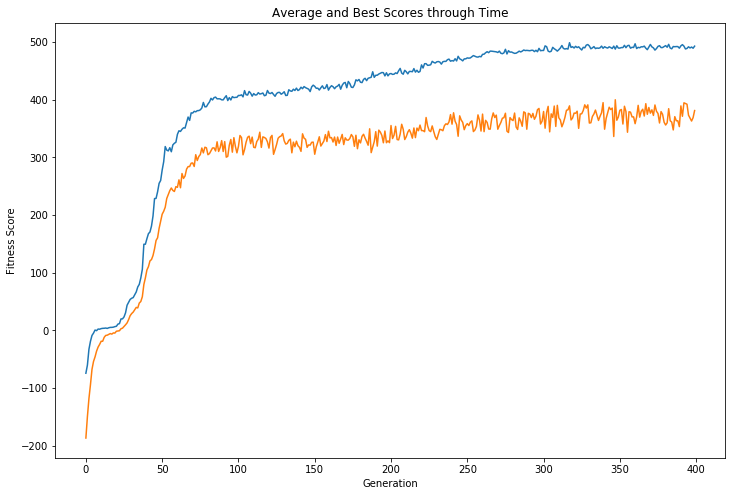

In [5]:
res = np.array(results)
plt.figure(figsize=(12,8))
plt.title('Average and Best Scores through Time')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.plot(range(400), res[:,1])
plt.plot(range(400), res[:,0])
plt.show()

# Compare with Benchmark
I crafted the dna string below as a benchmark. The strategy is:
* if rubbish is in square, pick it up
* if rubbish is visible, move to that square
* if next to a wall, move away from it
* otherwise move in a random direction

We can see that the robots that "evolved" using the genetic algorithm are superior to my benchmark strategy.

In [6]:
benchmark_dna = '226226336226226336226226226226226336226226336226226226116116116116116116116116116336336336336336336226226226006006336116556336226226226116116116116116116116116116006006006006006006006006006006006006006006006006006006006006006006006006006006006'

test = robot_from_dna(benchmark_dna)

test_result = test.simulate(100,200)
ga_result = best_robot.simulate(100,200)

print('Benchmark Ave Score:',test_result)
print('Evolved Ave Score:',ga_result)

Benchmark Ave Score: 426.9
Evolved Ave Score: 475.9


# Read the last N lines with the robot´s dna of output.txt

In [9]:
# Function to read 
# last N lines of the file  
def LastNlines(fname, N): 
    # opening file using with() method 
    # so that file get closed 
    # after completing work 
    lines = []
    with open(fname) as file: 
          
        # loop to read iterate  
        # last n lines and print it 
        for line in (file.readlines() [-N:]): 
            lines += [line]
    return lines 


# Driver Code:  
if __name__ == '__main__': 
    fname = 'output_3.txt'
    N = 2
    try: 
        lines =  LastNlines(fname, N) 
    except: 
        print('File not found')


In [79]:
robot_A = robot_from_dna(lines[0][:-1])
robot_B = robot_from_dna(lines[1][:-1])
coevolution = Coevolution(robot_A,robot_B)
times = []
for i in range(1000):
    total_scores = []
    for j in range(1,1000,50):
        scores = coevolution.simulate(1, j)
        sum_ = scores[0]+scores[1]
        total_scores += [sum_]
    times += [list(total_scores).index(max(total_scores))]



In [80]:
import collections
counter=collections.Counter(times)

In [81]:
counter

Counter({8: 54,
         10: 56,
         1: 67,
         7: 55,
         6: 61,
         12: 52,
         9: 39,
         14: 46,
         19: 44,
         5: 92,
         4: 72,
         18: 46,
         15: 28,
         13: 45,
         16: 29,
         3: 72,
         17: 35,
         2: 58,
         11: 49})

In [72]:
for j in range(1,1000,50):
    print(j)

1
51
101
151
201
251
301
351
401
451
501
551
601
651
701
751
801
851
901
951
